# Cursory Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data viz
import seaborn as sns
sns.set()

In [2]:
# Inspect dataframe for nulls and duplicates
def inspect(df):
    print('Number of Nulls per column:')
    print(df.isnull().sum())
    print(f'\nNumber of duplicates: {df.duplicated().sum()}')
    print(f"\nshape: {df.shape}")

## df1: [Fake News Data Set](https://www.kaggle.com/datasets/yash0956/fakenews)

In [3]:
df1 = pd.read_csv('./data/fake_news_dataset.csv')
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Author                   2119 non-null   object 
 1   Published                2120 non-null   object 
 2   Title                    2120 non-null   object 
 3   Text                     2075 non-null   object 
 4   Language                 2119 non-null   object 
 5   Site_url                 2119 non-null   object 
 6   Main_img_url             2119 non-null   object 
 7   Type                     2119 non-null   object 
 8   Label                    2119 non-null   object 
 9   Title_without_stopwords  2117 non-null   object 
 10  Text_without_stopwords   2069 non-null   object 
 11  HasImage                 2118 non-null   float64
dtypes: float64(1), object(11)
memory usage: 198.9+ KB
None


,Author,Published,Title,Text,Language,Site_url,Main_img_url,Type,Label,Title_without_stopwords,Text_without_stopwords,HasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [4]:
print(df1['Site_url'].value_counts())
df1['Site_url'].value_counts().describe()

Site_url
wnd.com                  100
clickhole.com            100
westernjournalism.com    100
returnofkings.com        100
prisonplanet.com         100
                        ... 
redstatewatcher.com        1
proudemocrat.com           1
projectveritas.com         1
globalresearch.ca          1
thepeoplescube.com         1
Name: count, Length: 69, dtype: int64


count     69.000000
mean      30.710145
std       37.430760
min        1.000000
25%        2.000000
50%        9.000000
75%       55.000000
max      100.000000
Name: count, dtype: float64

<Axes: xlabel='Site_url'>

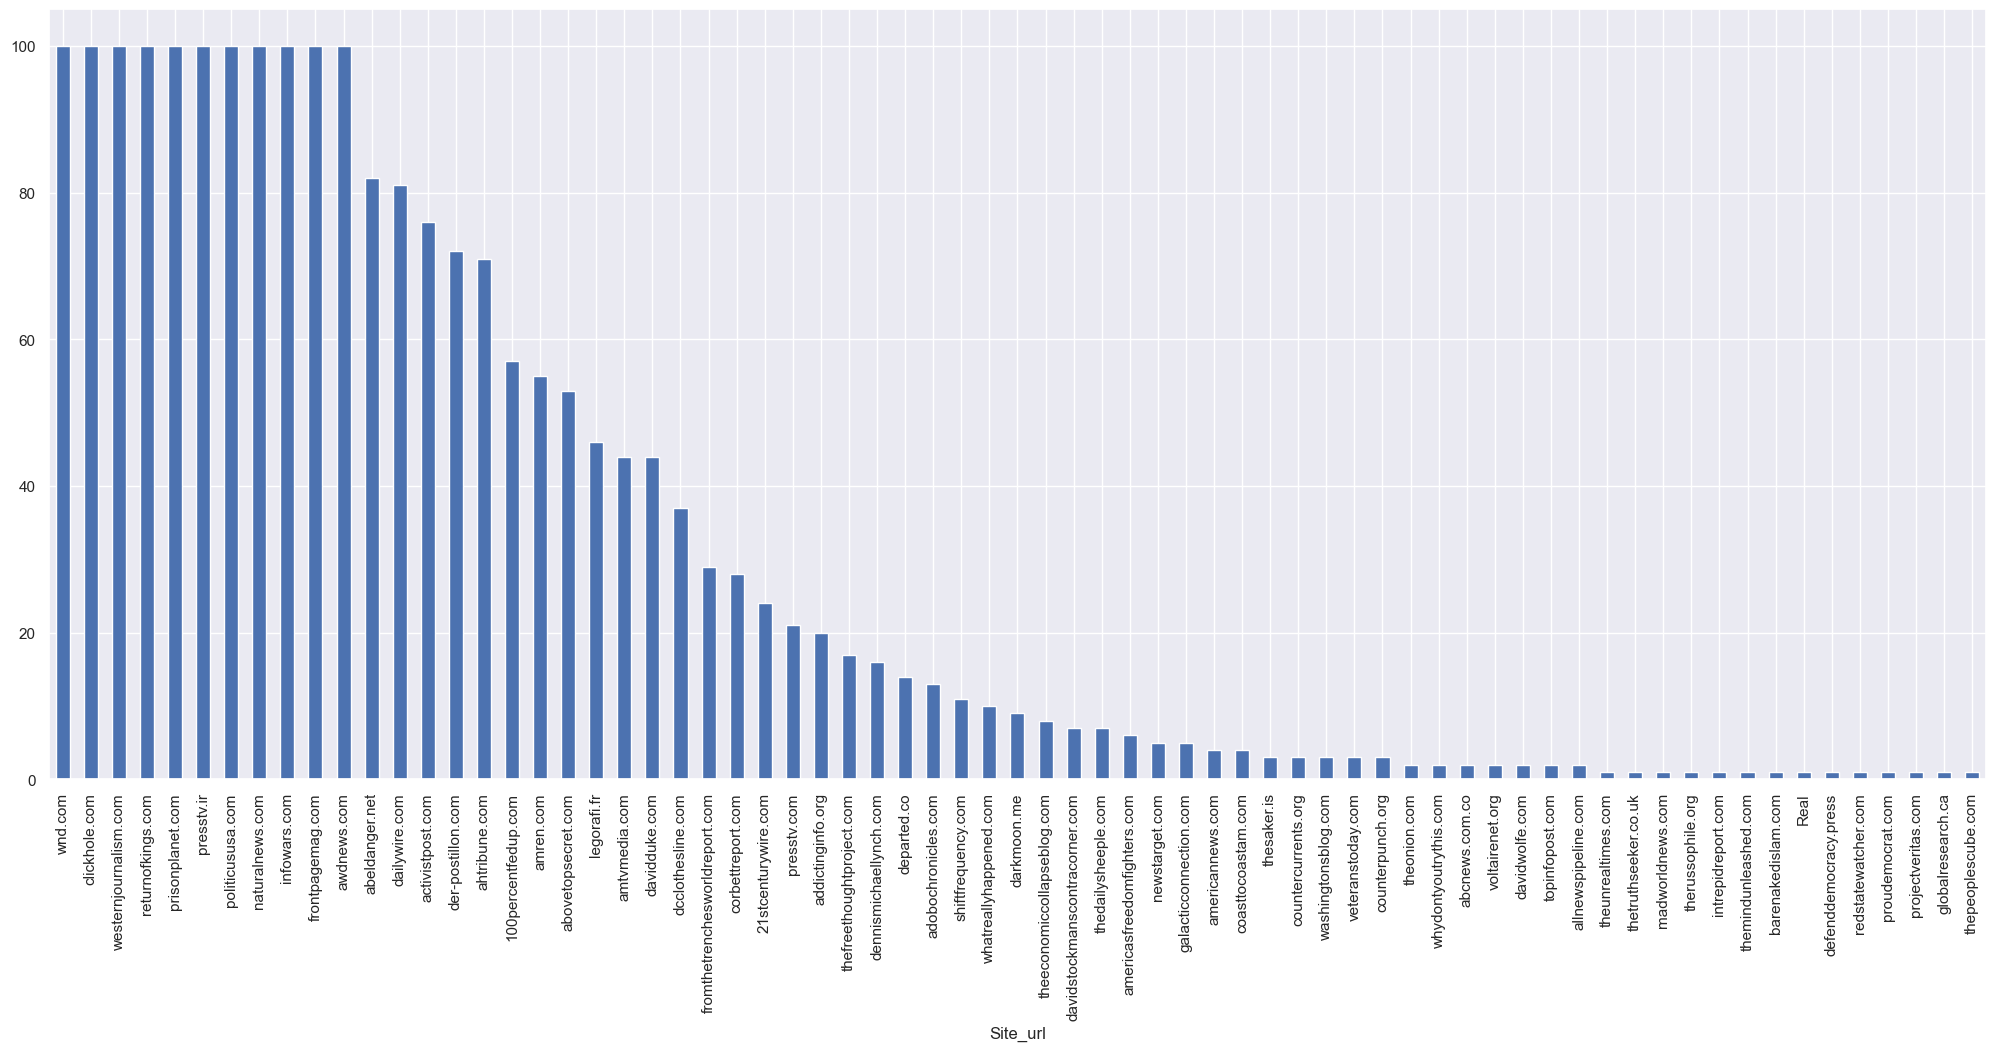

In [5]:
df1['Site_url'].value_counts().plot(kind='bar', figsize=(25, 10))

In [6]:
df1.groupby('Site_url')['Label'].value_counts()

Site_url                Label
100percentfedup.com     Real     57
21stcenturywire.com     Fake     24
Real                    1         1
abcnews.com.co          Fake      2
abeldanger.net          Fake     82
                                 ..
westernjournalism.com   Fake      2
whatreallyhappened.com  Fake     10
whydontyoutrythis.com   Real      2
wnd.com                 Real     98
                        Fake      2
Name: count, Length: 79, dtype: int64

In [7]:
df1['Type'].value_counts()

Type
bs                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    625
bias                                                                                                                                                                                                                                     

In [8]:
inspect(df1)

Number of Nulls per column:
Author                      1
Published                   0
Title                       0
Text                       45
Language                    1
Site_url                    1
Main_img_url                1
Type                        1
Label                       1
Title_without_stopwords     3
Text_without_stopwords     51
HasImage                    2
dtype: int64

Number of duplicates: 58

shape: (2120, 12)


### Observations

1. Not sure what criteria are being used to assign `Fake` or `Real`
    - There are some questionable sources where the articles are labeled `Real`, but their type is `bias`; theoritically, the content is true but heavily exaggerated
2. Source distribution is skewed; we may need to find other data sets to balance it out

## df2: [Getting Real About Fake News](https://www.kaggle.com/datasets/mrisdal/fake-news/)

In [9]:
df2 = pd.read_csv('./data/fake.csv')
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [10]:
df2['type'].value_counts()

type
bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: count, dtype: int64

<Axes: ylabel='language'>

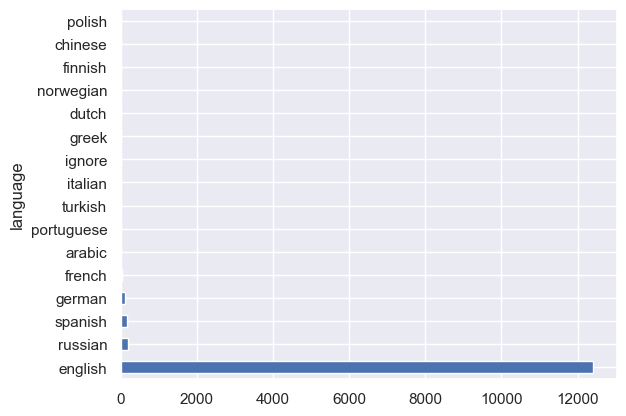

In [11]:
df2['language'].value_counts().plot(kind='barh')

In [12]:
inspect(df2)

Number of Nulls per column:
uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

Number of duplicates: 0

shape: (12999, 20)


### Observations

1. No label for fake or real news
    - Given description on data card, we can assume all these articles are unreliable

## df3: [WELFake Dataset](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification/)

In [13]:
df3 = pd.read_csv('./data/WELFake_Dataset.csv')
print(df3.info())
df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
None


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


label
1    37106
0    35028
Name: count, dtype: int64


<Axes: ylabel='count'>

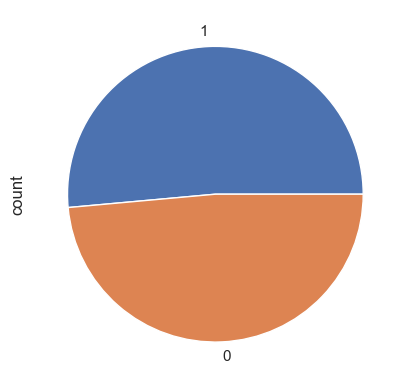

In [14]:
print(df3['label'].value_counts())
df3['label'].value_counts().plot(kind='pie')

In [15]:
inspect(df3)

Number of Nulls per column:
Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

Number of duplicates: 0

shape: (72134, 4)


### Observations

1. Diverse set of sources. Published in IEEE; therefore, likely high rigor in fact-checking
2. No sources though; may need some web crawling to find sources
3. 0 = real; 1 = fake

## df4: [All the News](https://www.kaggle.com/datasets/snapcrack/all-the-news/)

In [16]:
df4_1 = pd.read_csv('./data/articles1.csv')
df4_2 = pd.read_csv('./data/articles2.csv')
df4_3 = pd.read_csv('./data/articles3.csv')
print(df4_1.info())
print(df4_2.info())
print(df4_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   id           50000 non-null  int64  
 2   title        50000 non-null  object 
 3   publication  50000 non-null  object 
 4   author       43694 non-null  object 
 5   date         50000 non-null  object 
 6   year         50000 non-null  float64
 7   month        50000 non-null  float64
 8   url          0 non-null      float64
 9   content      50000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   49999 non-null  int64  
 1   id           49999 non-null  int64  
 2   title        49998 non-null  object 
 

In [17]:
# Reformat column in first csv
df4_1['url'] = np.NaN

# Merge all CSVs into one
df4 = pd.concat([df4_1, df4_2, df4_3])
print(df4.info())
df4.head()

<class 'pandas.core.frame.DataFrame'>
Index: 142570 entries, 0 to 42570
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   142570 non-null  int64  
 1   id           142570 non-null  int64  
 2   title        142568 non-null  object 
 3   publication  142570 non-null  object 
 4   author       126694 non-null  object 
 5   date         139929 non-null  object 
 6   year         139929 non-null  float64
 7   month        139929 non-null  float64
 8   url          85559 non-null   object 
 9   content      142570 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 12.0+ MB
None


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


<Axes: xlabel='publication'>

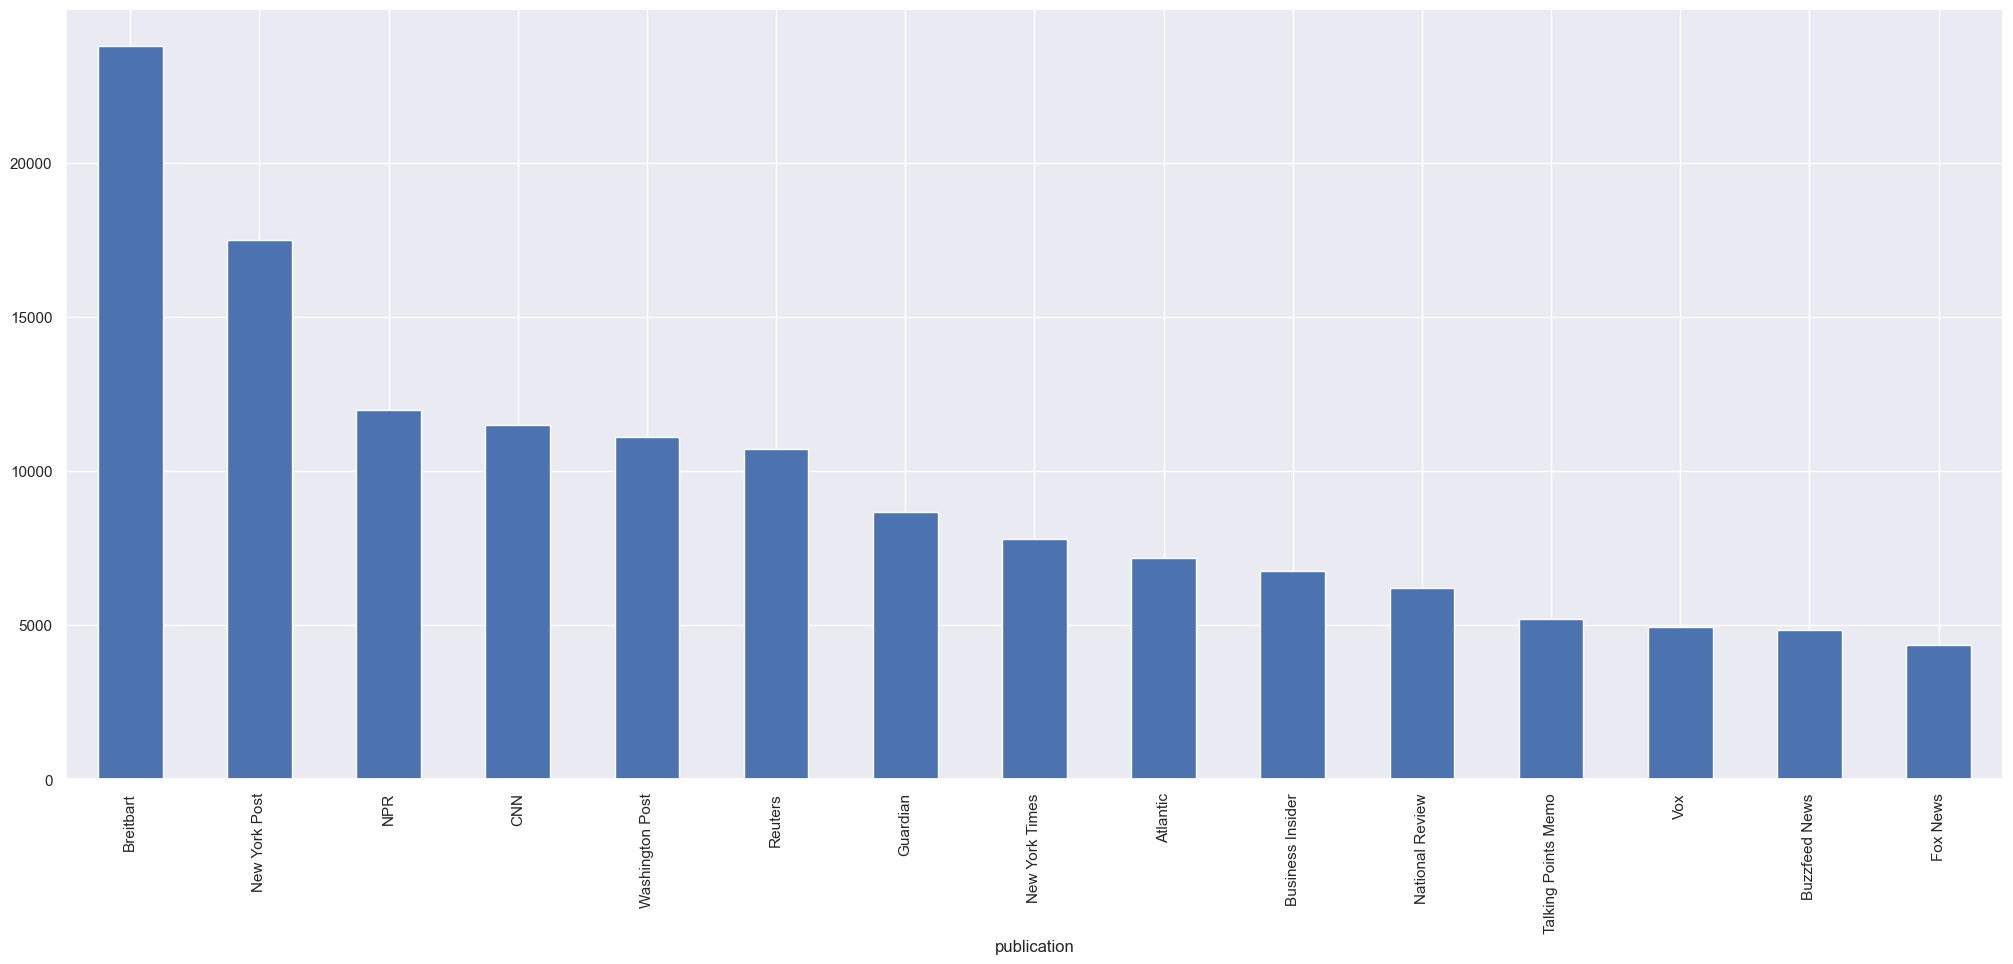

In [18]:
df4['publication'].value_counts().plot(kind='bar', figsize=(25, 10))

In [19]:
df4[df4['url'].isna()]['publication'].value_counts()

publication
Breitbart           23781
CNN                 11488
New York Times       7803
Atlantic             7179
Business Insider     6757
Fox News                3
Name: count, dtype: int64

In [20]:
inspect(df4)

Number of Nulls per column:
Unnamed: 0         0
id                 0
title              2
publication        0
author         15876
date            2641
year            2641
month           2641
url            57011
content            0
dtype: int64

Number of duplicates: 0

shape: (142570, 10)


### Observations

1. Numerous articles from mostly reputable sources
2. Simply a collection of news articles with sources listed
    - May make a blanket assumption that all are real
3. WAY too big
    - consider downsampling articles from each source, since we have plenty already

# Generating Sample

In [21]:
# isolate key features
df1 = df1[['Title', 'Label']]

# reformat dataframes by renaming columns, etc.
df1 = df1.rename(columns={'Title':'headline', 'Label':'is_fake'})
df1['is_fake'] = (df1['is_fake'] == 'Fake').astype(int)

In [22]:
# Isolate english articles
df2 = df2[df2['language'] == 'english']

# assumption that all articles are false
df2['is_fake'] = 1

# isolate key features
df2 = df2[['title', 'is_fake']]

# renaming columns
df2 = df2.rename(columns={'title': 'headline'})

In [23]:
# isolating key features
df3 = df3[['title', 'label']]

# renaming columns
df3 = df3.rename(columns={'title':'headline', 'label':'is_fake'})
df3 = df3.dropna(subset=['headline'])

In [24]:
# Too big, therefore downsample
df4_downsampled = df4.groupby('publication', group_keys=False).apply(lambda df: df.sample(1000))
print(df4_downsampled['publication'].value_counts())
len(df4_downsampled)
df4_downsampled

publication
Atlantic               1000
Breitbart              1000
Business Insider       1000
Buzzfeed News          1000
CNN                    1000
Fox News               1000
Guardian               1000
NPR                    1000
National Review        1000
New York Post          1000
New York Times         1000
Reuters                1000
Talking Points Memo    1000
Vox                    1000
Washington Post        1000
Name: count, dtype: int64


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
6038,59349,81276,Flying Rescue Missions in the Most Remote Reac...,Atlantic,Conor Friedersdorf,2016-10-26,2016.0,10.0,NaN,"On August 4th, 1790, barely a year after Georg..."
1924,55233,75974,"More Kids, Longer Life?",Atlantic,NaN,2016-01-12,2016.0,1.0,NaN,", I want to receive updates from partners and ..."
3845,57155,78492,Central Intelligence: A Fun Action Comedy You’...,Atlantic,David Sims,2016-06-17,2016.0,6.0,NaN,I want to receive updates from partners and...
4958,58268,79913,The Atlantic Daily: A Whole New World,Atlantic,Rosa Inocencio Smith,2016-08-24,2016.0,8.0,NaN,For us to continue writing great stori...
6985,60302,82550,The Freedoms of George Michael,Atlantic,Matt Thompson,2016-12-28,2016.0,12.0,NaN,George Michael was already a big star by the t...
...,...,...,...,...,...,...,...,...,...,...
37045,140507,211064,"The real welfare queens are our legislators, n...",Washington Post,Catherine Rampell,2016-04-04,2016.0,4.0,https://web.archive.org/web/20160405000359/htt...,Let’s not be coy. There’s a certain populatio...
36366,139828,210205,"To refresh a tired living room, choose more mo...",Washington Post,Mari-Jane Williams,2016-02-25,2016.0,2.0,https://web.archive.org/web/20160228021518/htt...,THE CHALLENGE Ken and Christy Marshall of ...
35358,138820,208881,Obama to impose new gun control curbs next week,Washington Post,Juliet Eilperin,2016-01-01,2016.0,1.0,https://web.archive.org/web/20160102012843/htt...,HONOLULU — President Obama will meet w...
39194,142656,213785,"Who, exactly, was Ivanka Trump endorsing?",Washington Post,Philip Bump,2016-07-22,2016.0,7.0,https://web.archive.org/web/20160723002212/htt...,As the speaker at the Republican con...


In [25]:
# isolate key features
df4 = df4_downsampled
df4['is_fake'] = 0
df4 = df4[['title', 'is_fake']]
df4 = df4.rename(columns={'title':'headline'})

In [26]:
print(df1.info())
print(df2.info())
print(df3.info())
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  2120 non-null   object
 1   is_fake   2120 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 25.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 12403 entries, 0 to 12998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  11723 non-null  object
 1   is_fake   12403 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 290.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 71576 entries, 0 to 72133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  71576 non-null  object
 1   is_fake   71576 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 6038

In [27]:
# merge data sets
merged = pd.concat([df1, df2, df3, df4])

# Dropping any duplicates or nulls, applying text cleaning pipeline
merged = merged.drop_duplicates().dropna(subset=['headline']).reset_index(drop=True)

Number of Nulls per column:
headline    0
is_fake     0
dtype: int64

Number of duplicates: 0

shape: (79492, 2)
is_fake
0    48906
1    30586
Name: count, dtype: int64


<Axes: ylabel='count'>

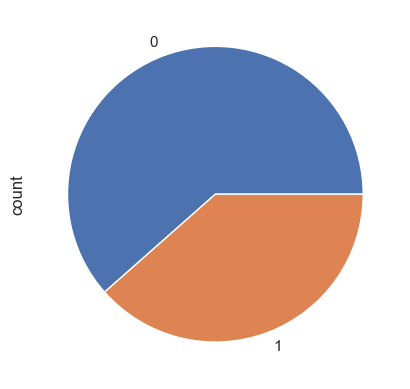

In [28]:
# Final evaluation
inspect(merged)
print(merged['is_fake'].value_counts())
merged['is_fake'].value_counts().plot(kind='pie')

In [29]:
# Saving to csv
compression_opts = dict(method='zip',archive_name='sample.csv')
merged.to_csv('./data/sample.zip', index=False, compression=compression_opts)

# preview
merged.head()

,headline,is_fake
0,muslims busted they stole millions in govt ben...,0
1,re why did attorney general loretta lynch plea...,0
2,breaking weiner cooperating with fbi on hillar...,0
3,pin drop speech by father of daughter kidnappe...,0
4,fantastic trumps point plan to reform healthc...,0
